# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv("cleaned_listing.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877 entries, 0 to 4876
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   row_id                       4877 non-null   int64  
 1   listing_id                   4877 non-null   float64
 2   host_id                      4877 non-null   int64  
 3   host_name                    4877 non-null   object 
 4   host_since                   4877 non-null   object 
 5   host_location                4877 non-null   object 
 6   host_response_time           4877 non-null   object 
 7   host_is_superhost            4877 non-null   object 
 8   neighbourhood_cleansed       4877 non-null   object 
 9   latitude                     4877 non-null   float64
 10  longitude                    4877 non-null   float64
 11  room_type                    4877 non-null   object 
 12  accommodates                 4877 non-null   int64  
 13  price             

In [2]:
df.head()

,row_id,listing_id,host_id,host_name,host_since,host_location,host_response_time,host_is_superhost,neighbourhood_cleansed,latitude,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month,host_location.1,availability_365
0,1,8.080000e+17,100179,Kenneth,3/28/2010,"Chicago, IL",within an hour,f,Woodlawn,41.784661,...,5.00,5.00,5.00,5.00,5.00,5.00,R22000086175,1.00,"Chicago, IL",0
1,2,3.955154e+07,303686027,Viceroy,10/21/2019,"Chicago, IL",within an hour,f,Near North Side,41.901490,...,5.00,5.00,5.00,4.50,5.00,4.50,2522874,0.05,"Chicago, IL",0
2,3,4.956814e+07,78969342,Daniel,6/21/2016,"Chicago, IL",Unknown,f,Lincoln Park,41.930520,...,4.69,5.00,4.69,4.38,5.00,4.38,R21000063268,0.72,"Chicago, IL",0
3,5,5.026912e+07,65832865,Alicia,4/5/2016,Unknown,Unknown,t,Uptown,41.969150,...,4.75,4.50,5.00,5.00,4.67,4.67,R21000071560,0.64,Unknown,0
4,8,2.915774e+07,4478538,Abhineyt,12/23/2012,"Chicago, IL",within an hour,f,West Town,41.897110,...,4.58,4.92,5.00,5.00,4.67,4.58,R18000034064,0.23,"Chicago, IL",0


In [3]:
#Dropping the columns that I don't plan on using for analysis.

df.drop(['latitude', 'longitude', 'host_location.1', 'row_id', 'license'], axis=1, inplace=True)
df.head()

,listing_id,host_id,host_name,host_since,host_location,host_response_time,host_is_superhost,neighbourhood_cleansed,room_type,accommodates,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,availability_365
0,8.080000e+17,100179,Kenneth,3/28/2010,"Chicago, IL",within an hour,f,Woodlawn,Entire home/apt,3,...,2/21/2023,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,0
1,3.955154e+07,303686027,Viceroy,10/21/2019,"Chicago, IL",within an hour,f,Near North Side,Private room,6,...,1/3/2021,5.00,5.00,5.00,5.00,4.50,5.00,4.50,0.05,0
2,4.956814e+07,78969342,Daniel,6/21/2016,"Chicago, IL",Unknown,f,Lincoln Park,Entire home/apt,6,...,7/14/2022,4.50,4.69,5.00,4.69,4.38,5.00,4.38,0.72,0
3,5.026912e+07,65832865,Alicia,4/5/2016,Unknown,Unknown,t,Uptown,Entire home/apt,15,...,8/21/2022,4.83,4.75,4.50,5.00,5.00,4.67,4.67,0.64,0
4,2.915774e+07,4478538,Abhineyt,12/23/2012,"Chicago, IL",within an hour,f,West Town,Entire home/apt,16,...,3/15/2020,4.83,4.58,4.92,5.00,5.00,4.67,4.58,0.23,0


In [4]:
df.replace('-', np.nan, inplace = True)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4874 entries, 0 to 4876
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   4874 non-null   float64
 1   host_id                      4874 non-null   int64  
 2   host_name                    4874 non-null   object 
 3   host_since                   4874 non-null   object 
 4   host_location                4874 non-null   object 
 5   host_response_time           4874 non-null   object 
 6   host_is_superhost            4874 non-null   object 
 7   neighbourhood_cleansed       4874 non-null   object 
 8   room_type                    4874 non-null   object 
 9   accommodates                 4874 non-null   int64  
 10  price                        4874 non-null   int64  
 11  minimum_nights               4874 non-null   int64  
 12  number_of_reviews            4874 non-null   int64  
 13  first_review      

In [ ]:
#What are the numerical features?
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.columns

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

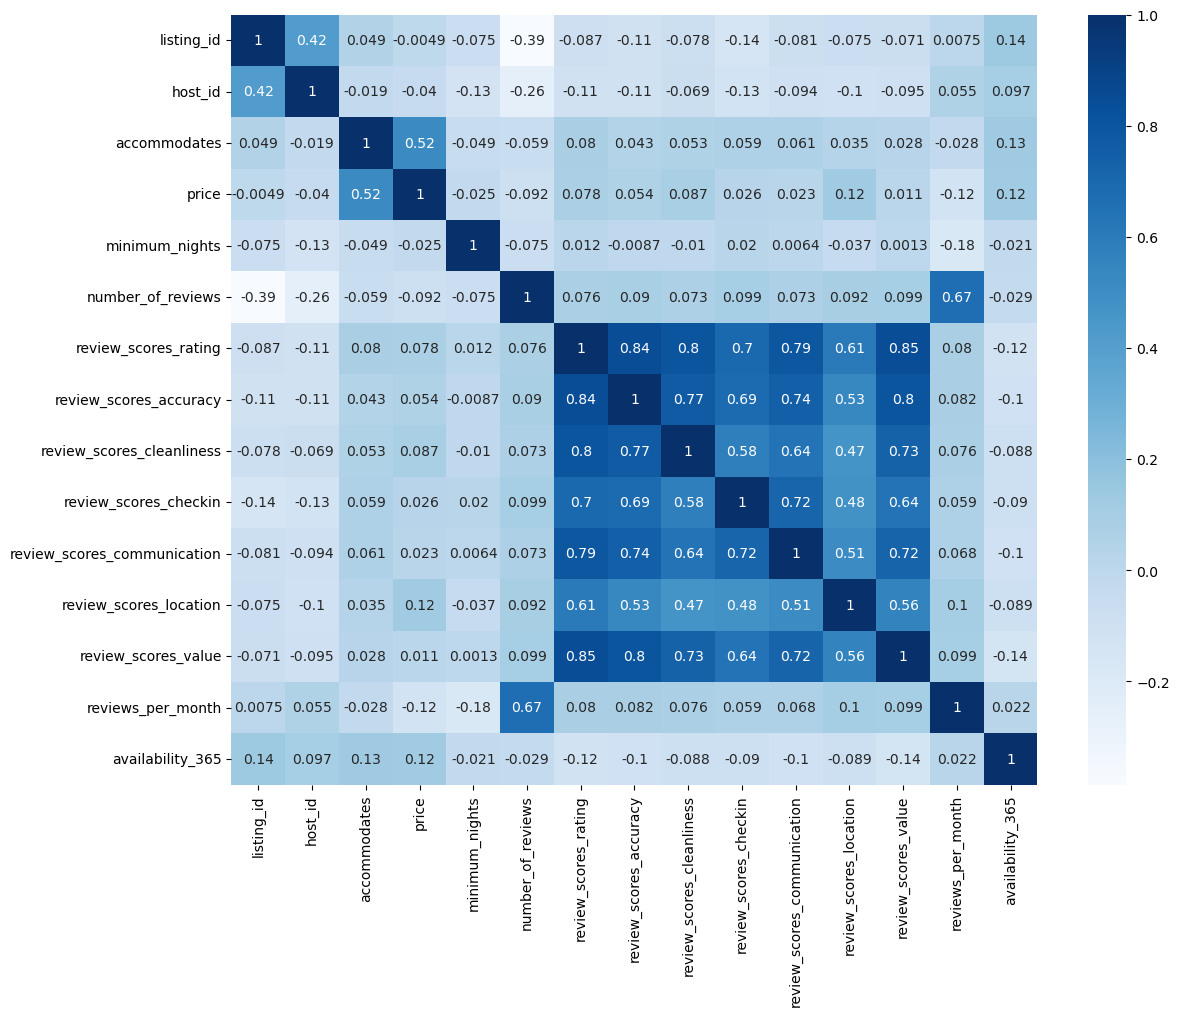

In [5]:
corr = df.corr()
_, ax = plt.subplots(figsize=(13,10)) 
# Graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='Blues',
                annot = True)

In [ ]:
# cmap = sns.diverging_palette(5, 250, as_cmap=True)
# def magnify():
#     return [dict(selector="th",
#                  props=[("font-size", "7pt")]),
#             dict(selector="td",
#                  props=[('padding', "0em 0em")]),
#             dict(selector="th:hover",
#                  props=[("font-size", "12pt")]),
#             dict(selector="tr:hover td:hover",
#                  props=[('max-width', '200px'),
#                         ('font-size', '12pt')])
# ]

# corr.style.background_gradient(cmap, axis=1)\
#     .format(precision=3)\
#     .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
#     .set_caption("Hover to magify")\
#     .set_table_styles(magnify())

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [6]:
# Creating X and y
X = df['review_scores_value']
y = df['review_scores_rating']


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Take a look at the train dataset
X_train
y_train

2492    4.61
4024    4.83
364     4.97
176     4.67
1921    4.73
        ... 
4152    5.00
1893    5.00
353     5.00
81      5.00
3930    4.70
Name: review_scores_rating, Length: 3411, dtype: float64

In [33]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.693
Model:                              OLS   Adj. R-squared:                  0.693
Method:                   Least Squares   F-statistic:                     7692.
Date:                  Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                          16:16:39   Log-Likelihood:                 1024.5
No. Observations:                  3411   AIC:                            -2045.
Df Residuals:                      3409   BIC:                            -2033.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.9224      0.044     20.977      0.000       0.836       1.009
review_scores_value     0.8151      0.009     87.706      0.000       0.797       0.833
==============================================================================
Omnibus:                     1854.497   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           401085.653
Skew:                          -1.450   Prob(JB):                         0.00
Kurtosis:                      56.044   Cond. No.                         70.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

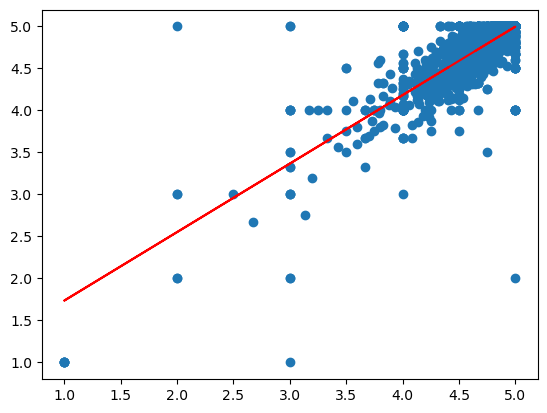

In [34]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.9224 + 0.8151*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

C:\Users\mdkro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


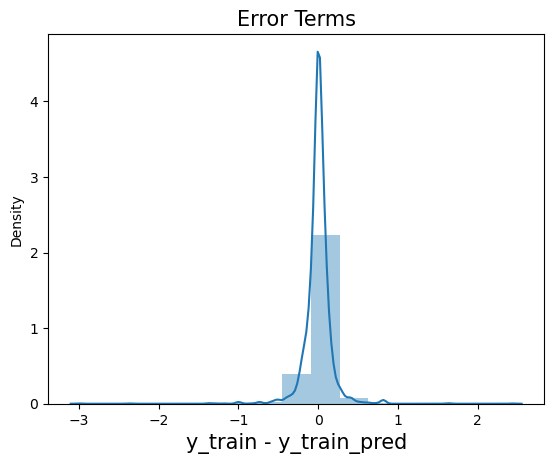

In [35]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.693
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? Yes
3. Was your plot of the error terms a bell curve? Yes